In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
np.random.seed(1000)

In [3]:
A = np.random.randn(1000,10)

In [4]:
x_ = np.zeros(10)
for i in range(10):
  if i % 2 == 0:
    x_[i] = np.random.uniform(-(i+2),-(i+1))
  else:
    x_[i] = np.random.uniform(i+1,i+2)

x_ = x_.reshape(10,1)

In [5]:
e = np.random.randn(1000,1)

In [6]:
y = np.add(np.matmul(A,x_),e)

In [7]:
def evalf(x1, lambd):
  res = np.multiply(lambd/2,np.matmul(x1.transpose(),x1))+((np.linalg.norm(np.subtract(np.matmul(A,x1),y)))**2)/2
  return res

In [8]:
def evalg(x1, lambd):
  arr = np.zeros(10)
  err = np.subtract(np.matmul(A,x1),y)
  for i in range(10):
    arr[i] = lambd*x1[i] + np.matmul(err.transpose(),A[:,i])
  return arr.reshape(10,1)

In [9]:
def evalh(x1, lambd):
  hes = np.zeros((10,10))
  for i in range(10):
    for j in range(10):
      hes[i][j] = np.matmul(A[:,i],A[:,j])
      if i == j:
        hes[i][j] += lambd
  return hes

#Ans 1:

The newly added regularizer term in the expression keeps a check on the value of x. Since what we had previously was an expression with several variables, the regularizer keeps it from fluctuating very much and does not let x take extreme values.

In [10]:
def compute_steplength_backtracking_scaled_direction(x, p, gradf, alpha_start, rho, gamma, d_k, lambd):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*np.matmul(d_k,p), lambd) > evalf(x, lambd) + gamma*alpha*(np.matmul(gradf.transpose(),np.matmul(d_k,p))):
    alpha = rho*alpha

  return alpha

In [11]:
def Newton(n, tol, lambd, *args):
  xlist = []
  x = np.zeros(n).reshape(n,1)
  xlist.append(x)
  grad_f = evalg(x, lambd)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  hes_f = evalh(x, lambd)

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 10000:
    p = -grad_f
    d = np.linalg.inv(hes_f)
    step_length = compute_steplength_backtracking_scaled_direction(x, p, grad_f, alpha, rho, gamma, d, lambd)
    x = np.add(x, np.multiply(step_length, np.matmul(d,p)))
    xlist.append(x)
    k += 1 
    grad_f = evalg(x, lambd) 
    hes_f = evalh(x, lambd)
  return k, x, evalf(x, lambd), xlist

In [12]:
lamb = [1e-3, 1e-2, 0.1, 1]
kl = []
xl = []
fl = []
xll = []
n_time = []
for i in lamb:
  start_time = timer()
  k, x, f, l = Newton(10, 1e-5, i, 0.99, 0.5, 0.5)
  end_time = timer()
  n_time.append(end_time - start_time)
  kl.append(k)
  xl.append(x)
  fl.append(f)
  xll.append(l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


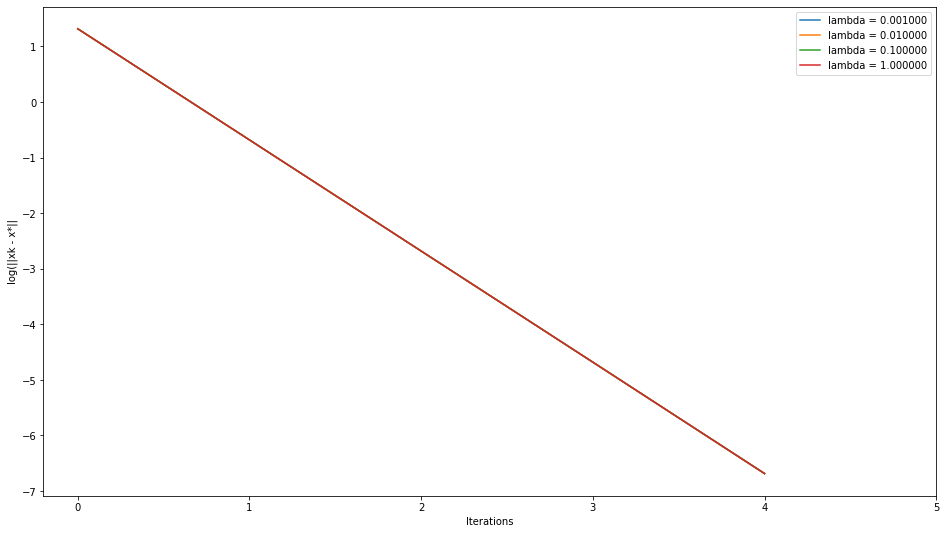

In [13]:
pll = []

for i in range(len(lamb)):
  pl = []
  for j in range(kl[i]+1):
    pl.append(np.log10(np.linalg.norm(np.subtract(xll[i][j],xl[i]))))
  pll.append(pl)

kl = range(0,max(kl)+1)
plt.figure(figsize = (16,9))
for i in range(len(lamb)):
  plt.plot(kl,pll[i],label = 'lambda = %f'%(lamb[i]))

ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

#Ans 4:

a) For iterates : The required plot is shown above. For all given values of $\lambda$ it follows similar curve, hence all the curves overlap each other.
So, convergence rate for each value of $\lambda$ is same and on finding it through the quotient of the norms as given in notes, we can observe it follows Q-Linear.

b) For objective function value : The required plot is shown above. For all given values of $\lambda$ it follows similar curve, hence all the curves overlap each other.
So, convergence rate for each value of $\lambda$ is same and on finding it through the quotient of the norms as given in notes, we can observe it follows Q-Linear.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


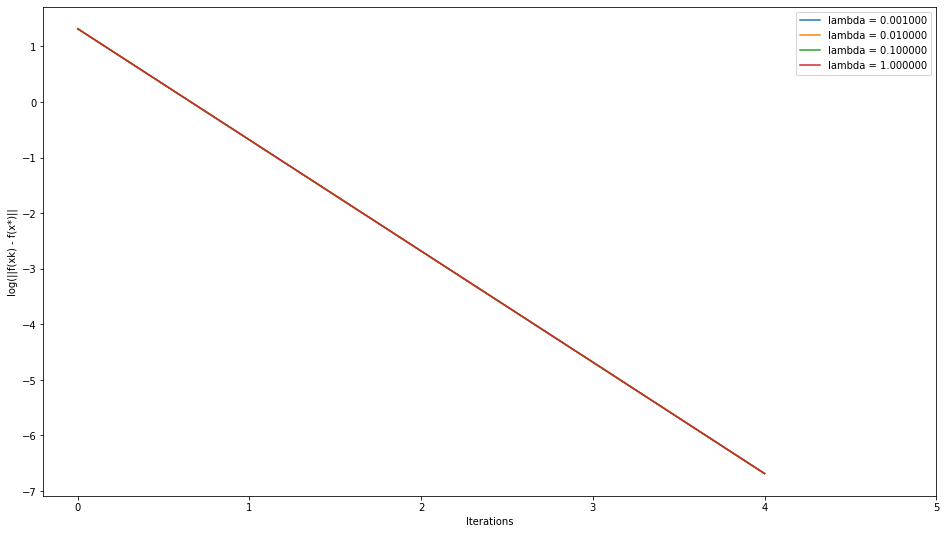

In [14]:
fll = []

for i in range(len(lamb)):
  fnl = []
  for j in range(kl[i]+1):
    fnl.append(np.log10(abs(evalf(xll[i][j],lamb[i])-fl[i])))
  fll.append(pl)

kl = range(0,max(kl)+1)
plt.figure(figsize = (16,9))
for i in range(len(lamb)):
  plt.plot(kl,fll[i],label = 'lambda = %f'%(lamb[i]))

ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('log(||f(xk) - f(x*)||')
plt.show()

In [15]:
def compute_steplength_backtracking(x, gradf, B, alpha_start, rho, gamma, lambd):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*-np.matmul(B,gradf), lambd) > evalf(x, lambd) + gamma*alpha*np.matmul(gradf.transpose(),-np.matmul(B,gradf)):
    alpha = rho*alpha

  return alpha

In [16]:
def BFGS(n, tol, lambd, *args):
  xlist = []
  x1 = np.zeros(n).reshape(n,1)
  xlist.append(x1)
  grad_f = evalg(x1, lambd)

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  I = np.identity(n)

  B = I

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 3000:
    alpha = compute_steplength_backtracking(x1, grad_f, B, alpha_start, rho, gamma, lambd)
    x2 = np.add(x1, np.multiply(alpha,np.matmul(B,-grad_f)))
    s = x2 - x1
    y = evalg(x2, lambd) - evalg(x1, lambd)
    mu = 1/np.matmul(y.transpose(),s)
    #print(p,alpha,x2,s,y,mu)
    B = np.add(np.matmul(np.matmul(np.subtract(I,np.matmul(np.multiply(mu,s),y.transpose())),B),np.subtract(I,np.matmul(np.multiply(mu,y),s.transpose()))),np.matmul(np.multiply(mu,s),s.transpose()))
    x1 = x2
    xlist.append(x1)
    grad_f = evalg(x2, lambd)
    k = k+1
    #print(np.linalg.norm(grad_f))
  return k, x1, evalf(x1, lambd), xlist

In [17]:
lamb = [1e-3, 1e-2, 0.1, 1]
kl = []
xl = []
fl = []
xll = []
b_time = []
for i in lamb:
  start_time = timer()
  k, x, f, l = BFGS(10, 1e-5, i, 0.99, 0.5, 0.5)
  end_time = timer()
  b_time.append(end_time - start_time)
  kl.append(k)
  xl.append(x)
  fl.append(f)
  xll.append(l)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


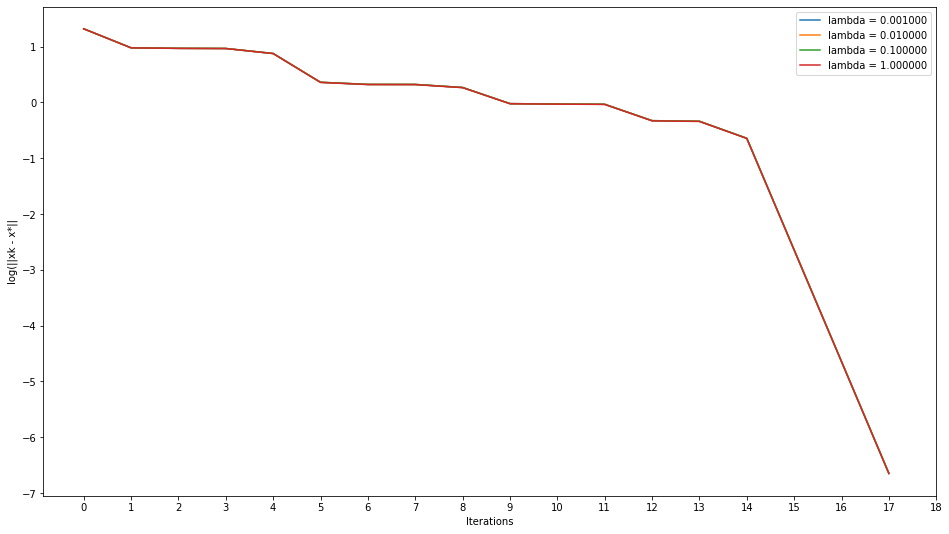

In [18]:
pll = []

for i in range(len(lamb)):
  pl = []
  for j in range(kl[i]+1):
    pl.append(np.log10(np.linalg.norm(np.subtract(xll[i][j],xl[i]))))
  pll.append(pl)

kl = range(0,max(kl)+1)
plt.figure(figsize = (16,9))
for i in range(len(lamb)):
  plt.plot(kl,pll[i],label = 'lambda = %f'%(lamb[i]))

ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('log(||xk - x*||')
plt.show()

#Ans 5:

a) For iterates : The required plot is shown above. For all given values of $\lambda$ it follows similar curve, hence all the curves overlap each other.
So, convergence rate for each value of $\lambda$ is same and on finding it through the quotient of the norms as given in notes, we can observe it follows Q-Linear.

b) For objective function value : The required plot is shown above. For all given values of $\lambda$ it follows similar curve, hence all the curves overlap each other.
So, convergence rate for each value of $\lambda$ is same and on finding it through the quotient of the norms as given in notes, we can observe it follows Q-Linear.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


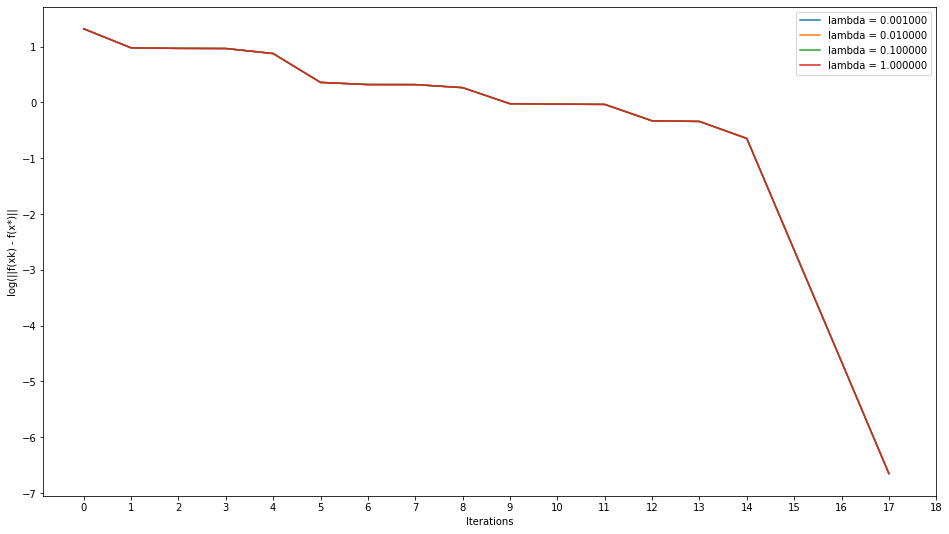

In [19]:
fll = []

for i in range(len(lamb)):
  fnl = []
  for j in range(kl[i]+1):
    fnl.append(np.log10(abs(evalf(xll[i][j],lamb[i])-fl[i])))
  fll.append(pl)

kl = range(0,max(kl)+1)
plt.figure(figsize = (16,9))
for i in range(len(lamb)):
  plt.plot(kl,fll[i],label = 'lambda = %f'%(lamb[i]))

ax1 = plt.subplot()
ax1.set_xticks(kl)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('log(||f(xk) - f(x*)||')
plt.show()

In [20]:
print(n_time)
print(b_time)

[0.019101758000033442, 0.011983071000031487, 0.009999997999784682, 0.008904664000056073]
[0.04106648600009066, 0.019258097000147245, 0.02615060700009053, 0.02063300400004664]


#Ans 6:

The minimum function value reached by both methods at each value of lambda is similar.

Newton's method takes 5 iterations whereas BFGS takes 18 iterations.

For $\lambda = 0.001$:

Time taken by Newton's Method : 0.0153 seconds

Time taken by BFGS : 0.028 seconds

For $\lambda = 0.01$:

Time taken by Newton's Method : 0.0111 seconds

Time taken by BFGS : 0.017 seconds

For $\lambda = 0.1$:

Time taken by Newton's Method : 0.0114 seconds

Time taken by BFGS : 0.0175 seconds

For $\lambda = 1$:

Time taken by Newton's Method : 0.0118 seconds

Time taken by BFGS : 0.0181 seconds

We can observe that for smaller values of $\lambda$ BFGS takes about 2 times the time taken by Newton's method but for large values of $\lambda$ BFGS takes about 1.5 times the time taken by Newton's method.